In [1]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split as tts,cross_val_score,ShuffleSplit
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score,f1_score,classification_report,roc_auc_score
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows',None)
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly_express as px

In [2]:
df5=pd.read_csv("revenue_clust.csv")
df5

,Unnamed: 0,Customer No.,Cust Type,Make,Year,Model,City,State,Order Type,Total Revenue,Total Servicing Hrs,Clusters
0,2,10,Retail,GENERAL MOTORS,2012,OPTRA,mumbai,maharashtra,Running Repairs,599.84,3.000000,low_revenue
1,7,1000,Retail,MARUTI SUZUKI,2013,ALTO,pune,maharashtra,Paid Service,1980.84,2.000000,low_revenue
2,8,1000,Retail,MARUTI SUZUKI,2013,ALTO,pune,maharashtra,Running Repairs,749.42,5.000000,low_revenue
3,10,1000,Retail,MARUTI SUZUKI,2014,ALTO,pune,maharashtra,Running Repairs,446.75,5.000000,low_revenue
4,13,10000,Retail,MARUTI SUZUKI,2014,WAGONR,hyderabad,telangana,SMC Value Package,1001.29,3.000000,low_revenue
...,...,...,...,...,...,...,...,...,...,...,...,...
378417,379637,MFCWP01,MFCWL,MARUTI SUZUKI,2012,WAGONR,pune,maharashtra,Paid Service,25074.28,52.333333,high_revenue
378418,379645,MFCWP01,MFCWL,MARUTI SUZUKI,2013,SWIFT,pune,maharashtra,Paid Service,24515.27,148.500000,high_revenue
378419,379661,MFCWP01,MFCWL,TATA MOTORS,2013,INDICA,pune,maharashtra,Paid Service,35618.95,263.500000,high_revenue
378420,379668,MFCWP01,MFCWL,TOYOTA,2012,COROLLA,pune,maharashtra,Running Repairs,24141.05,84.000000,high_revenue


In [3]:
df5=df5[df5['Year']==2016]

In [4]:
df5['Year'].value_counts()

2016    153461
Name: Year, dtype: int64

In [5]:
df5=df5[['Customer No.','Clusters']]
df5

,Customer No.,Clusters
13,100007,low_revenue
18,100011,low_revenue
29,100026,low_revenue
38,100035,low_revenue
45,100040,low_revenue
...,...,...
378397,MFCCM14,high_revenue
378400,MFCCM14,high_revenue
378405,MFCCM19,high_revenue
378406,MFCCM19,high_revenue


In [6]:
df=pd.read_csv("Final_invoice.csv")
df = df.rename(columns={'Total Amt Wtd Tax.':'Total_Expense'})

In [7]:
df.head(2)

,Unnamed: 0,Amt Rcvd From Custom,Amt Rcvd From Ins Co,Area / Locality,CGST(14%),CGST(2.5%),CGST(6%),CGST(9%),CITY,Cash /Cashless Type,Claim No.,Cust Type,Customer No.,District,Expiry Date,Gate Pass Date,Gate Pass Time,IGST(12%),IGST(18%),IGST(28%),IGST(5%),Insurance Company,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,ODN No.,OSL Total,Order Type,Outstanding Amt,Parts Total,Pin code,Plant,Plant Name1,Policy no.,Print Status,Recovrbl Exp,Regn No,SGST/UGST(14%),SGST/UGST(2.5%),SGST/UGST(6%),SGST/UGST(9%),Service Advisor Name,TDS amount,Technician Name,Total_Expense,Total CGST,Total GST,Total IGST,Total SGST/UGST,Total Value,User ID
0,0,0.0,0.0,MAJIWADA,0.0,0.0,0.0,0.0,Thane,NaN,NaN,Retail,67849,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-02,7005200002,11:30:36,168303,2014-12-13,14:29:43,49317,1203.14,GENERAL MOTORS,0.00,SPARK,7.005200e+09,500.06,Paid Service,0.0,2348.75,400601,BC01,THANE,NaN,NO,0.0,KA19MA1291,0.0,0.0,0.0,0.0,NaN,0.0,RUPESH,4051.95,0.0,0.0,0.0,0.0,4051.95,BC01FS1
1,1,0.0,0.0,THNAE,0.0,0.0,0.0,0.0,THNAE,NaN,NaN,Retail,84419,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-03,7005200003,10:07:32,173997,2015-01-02,14:12:18,78584,804.26,TATA MOTORS,197.03,INDICA,7.005200e+09,0.00,SMC Value Package,0.0,0.00,400603,BC01,THANE,NaN,NO,0.0,MH43R3046,0.0,0.0,0.0,0.0,NaN,0.0,PRASHANT,1001.29,0.0,0.0,0.0,0.0,1001.29,BC01SA2


In [8]:
import pgeocode
nomi = pgeocode.Nominatim('IN')


In [9]:
df["City"]=nomi.query_postal_code(np.array(df["Pin code"].astype(str))).county_name
# Data_Finalinvoice["updated_District"]=nomi.query_postal_code(np.array(Data_Finalinvoice["Pin code"].astype(str))).state_name
# Data_Finalinvoice["updated_Location_Area"]=nomi.query_postal_code(np.array(Data_Finalinvoice["Pin code"].astype(str))).place_name

In [10]:
df["Invoice_DateTime"]=df["Invoice Date"]+' '+df["Invoice Time"]
df["JobCard_DateTime"]=df["JobCard Date"]+' '+df["JobCard Time"]
df['JobCard_DateTime'] = pd.to_datetime(df['JobCard_DateTime'],dayfirst=True)
df['Invoice_DateTime'] = pd.to_datetime(df['Invoice_DateTime'],dayfirst=True)
df["Service_Time"]=df["Invoice_DateTime"]-df["JobCard_DateTime"]

In [11]:
df["Invoice_DateTime"] = pd.to_datetime(df["Invoice_DateTime"])
df["JobCard_DateTime"] = pd.to_datetime(df["JobCard_DateTime"])
df['Job_duration(in hrs)']=(df['Invoice_DateTime'] -df['JobCard_DateTime']).astype('timedelta64[h]')

In [12]:
df["Year"] = pd.DatetimeIndex(df["JobCard_DateTime"]).year

In [13]:
df["month"] = pd.DatetimeIndex(df["JobCard_DateTime"]).month

In [14]:
df.head()

,Unnamed: 0,Amt Rcvd From Custom,Amt Rcvd From Ins Co,Area / Locality,CGST(14%),CGST(2.5%),CGST(6%),CGST(9%),CITY,Cash /Cashless Type,Claim No.,Cust Type,Customer No.,District,Expiry Date,Gate Pass Date,Gate Pass Time,IGST(12%),IGST(18%),IGST(28%),IGST(5%),Insurance Company,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,ODN No.,OSL Total,Order Type,Outstanding Amt,Parts Total,Pin code,Plant,Plant Name1,Policy no.,Print Status,Recovrbl Exp,Regn No,SGST/UGST(14%),SGST/UGST(2.5%),SGST/UGST(6%),SGST/UGST(9%),Service Advisor Name,TDS amount,Technician Name,Total_Expense,Total CGST,Total GST,Total IGST,Total SGST/UGST,Total Value,User ID,City,Invoice_DateTime,JobCard_DateTime,Service_Time,Job_duration(in hrs),Year,month
0,0,0.0,0.0,MAJIWADA,0.0,0.0,0.0,0.0,Thane,NaN,NaN,Retail,67849,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-02,7005200002,11:30:36,168303,2014-12-13,14:29:43,49317,1203.14,GENERAL MOTORS,0.00,SPARK,7.005200e+09,500.06,Paid Service,0.0,2348.75,400601,BC01,THANE,NaN,NO,0.0,KA19MA1291,0.0,0.0,0.0,0.0,NaN,0.0,RUPESH,4051.95,0.0,0.0,0.0,0.0,4051.95,BC01FS1,Thane,2015-01-02 11:30:36,2014-12-13 14:29:43,19 days 21:00:53,477.0,2014,12
1,1,0.0,0.0,THNAE,0.0,0.0,0.0,0.0,THNAE,NaN,NaN,Retail,84419,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-03,7005200003,10:07:32,173997,2015-01-02,14:12:18,78584,804.26,TATA MOTORS,197.03,INDICA,7.005200e+09,0.00,SMC Value Package,0.0,0.00,400603,BC01,THANE,NaN,NO,0.0,MH43R3046,0.0,0.0,0.0,0.0,NaN,0.0,PRASHANT,1001.29,0.0,0.0,0.0,0.0,1001.29,BC01SA2,Thane,2015-01-03 10:07:32,2015-01-02 14:12:18,0 days 19:55:14,19.0,2015,1
2,2,0.0,0.0,THANE,0.0,0.0,0.0,0.0,THANE[W],NaN,NaN,Retail,81055,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-03,7005200004,11:12:57,173889,2015-01-02,11:40:44,33985,180.19,MARUTI SUZUKI,0.00,ZEN,7.005200e+09,0.00,Running Repairs,0.0,52.95,400607,BC01,THANE,NaN,NO,0.0,AP09AX0582,0.0,0.0,0.0,0.0,NaN,0.0,IMRAN,233.14,0.0,0.0,0.0,0.0,233.14,BC01SA2,Thane,2015-01-03 11:12:57,2015-01-02 11:40:44,0 days 23:32:13,23.0,2015,1
3,3,0.0,0.0,THNAE,0.0,0.0,0.0,0.0,THNAE,NaN,NaN,Retail,84419,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-03,7005200005,11:40:44,174158,2015-01-03,10:12:32,78584,0.00,TATA MOTORS,0.00,INDICA,7.005200e+09,0.00,SMC Redemption,0.0,0.00,400603,BC01,THANE,NaN,NO,0.0,MH43R3046,0.0,0.0,0.0,0.0,NaN,0.0,PRASHANT,0.00,0.0,0.0,0.0,0.0,0.00,BC01SA2,Thane,2015-01-03 11:40:44,2015-01-03 10:12:32,0 days 01:28:12,1.0,2015,1
4,4,0.0,0.0,THANE,0.0,0.0,0.0,0.0,THANE,NaN,NaN,Retail,18980,Maharashtra,NaN,NaN,00:00:00,0.0,0.0,0.0,0.0,NaN,2015-01-03,7005200006,12:07:17,173860,2015-01-02,10:45:42,50057,1202.97,HYUNDAI,100.00,SANTRO XING,7.005200e+09,499.99,Paid Service,0.0,944.16,400603,BC01,THANE,NaN,NO,0.0,MH04CD9768,0.0,0.0,0.0,0.0,NaN,0.0,DAYANAND,2747.12,0.0,0.0,0.0,0.0,2747.12,BC01SA2,Thane,2015-01-03 12:07:17,2015-01-02 10:45:42,1 days 01:21:35,25.0,2015,1


In [15]:
df[df['Job_duration(in hrs)']<0]

,Unnamed: 0,Amt Rcvd From Custom,Amt Rcvd From Ins Co,Area / Locality,CGST(14%),CGST(2.5%),CGST(6%),CGST(9%),CITY,Cash /Cashless Type,Claim No.,Cust Type,Customer No.,District,Expiry Date,Gate Pass Date,Gate Pass Time,IGST(12%),IGST(18%),IGST(28%),IGST(5%),Insurance Company,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,ODN No.,OSL Total,Order Type,Outstanding Amt,Parts Total,Pin code,Plant,Plant Name1,Policy no.,Print Status,Recovrbl Exp,Regn No,SGST/UGST(14%),SGST/UGST(2.5%),SGST/UGST(6%),SGST/UGST(9%),Service Advisor Name,TDS amount,Technician Name,Total_Expense,Total CGST,Total GST,Total IGST,Total SGST/UGST,Total Value,User ID,City,Invoice_DateTime,JobCard_DateTime,Service_Time,Job_duration(in hrs),Year,month
359015,794156,NaN,NaN,PUDUPAKKAM,NaN,NaN,NaN,NaN,CHENNAI,NaN,NaN,Retail,182085,Tamil Nadu,NaN,NaN,00:00:00,NaN,NaN,NaN,NaN,NaN,2016-05-02,7167000988,15:12:11,363294,2016-05-02,15:12:44,62001,0.0,MARUTI SUZUKI,0.0,SWIFT DZIRE,NaN,0.0,Running Repairs,NaN,0.0,603103,X085,X085 - SRI MOTORS,NaN,NO,0.0,TN19M6594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,X085SA1,Kanchipuram,2016-05-02 15:12:11,2016-05-02 15:12:44,-1 days +23:59:27,-1.0,2016,5


In [16]:
# df.drop(index=359015,axis=0,inplace=True)

In [17]:
df.Year.value_counts()

2016    196156
2015    125393
2014     95777
2013     56240
2012     18748
Name: Year, dtype: int64

In [18]:
# df.columns

In [19]:
df.shape

(492314, 66)

In [20]:
len(df['Invoice No'].unique())

492314

In [21]:
len(df['Customer No.'].unique())

253484

In [22]:
df.Year.value_counts()

2016    196156
2015    125393
2014     95777
2013     56240
2012     18748
Name: Year, dtype: int64

In [23]:
year_16=df[df["Year"]==2016]

In [24]:
year_16.drop(["Unnamed: 0"],1,inplace=True)

In [25]:
year_16.head(2)

,Amt Rcvd From Custom,Amt Rcvd From Ins Co,Area / Locality,CGST(14%),CGST(2.5%),CGST(6%),CGST(9%),CITY,Cash /Cashless Type,Claim No.,Cust Type,Customer No.,District,Expiry Date,Gate Pass Date,Gate Pass Time,IGST(12%),IGST(18%),IGST(28%),IGST(5%),Insurance Company,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,ODN No.,OSL Total,Order Type,Outstanding Amt,Parts Total,Pin code,Plant,Plant Name1,Policy no.,Print Status,Recovrbl Exp,Regn No,SGST/UGST(14%),SGST/UGST(2.5%),SGST/UGST(6%),SGST/UGST(9%),Service Advisor Name,TDS amount,Technician Name,Total_Expense,Total CGST,Total GST,Total IGST,Total SGST/UGST,Total Value,User ID,City,Invoice_DateTime,JobCard_DateTime,Service_Time,Job_duration(in hrs),Year,month
295028,NaN,NaN,MUMBAI,NaN,NaN,NaN,NaN,BHANDUP,NaN,NaN,Retail,119371,Maharashtra,NaN,2016-01-02 00:00:00,15:41:33,NaN,NaN,NaN,NaN,NaN,2016-01-02,7005202789,11:27:27,300412,2016-01-02,10:52:24,35654,1125.76,MARUTI SUZUKI,291.45,ZEN ESTILO,NaN,0.0,SMC Value Package,NaN,2082.07,400089,BC01,THANE,NaN,YES,0.0,MH02BD6668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3499.28,NaN,NaN,NaN,NaN,NaN,BC01SA2,Mumbai,2016-01-02 11:27:27,2016-01-02 10:52:24,0 days 00:35:03,0.0,2016,1
295029,NaN,NaN,THNAE,NaN,NaN,NaN,NaN,THANE,NaN,NaN,Retail,128929,Maharashtra,NaN,2016-01-02 00:00:00,13:05:33,NaN,NaN,NaN,NaN,NaN,2016-01-02,7005202790,13:03:16,300447,2016-01-02,11:50:58,70730,233.85,MARUTI SUZUKI,0.00,SWIFT,NaN,0.0,Running Repairs,NaN,195.44,400604,BC01,THANE,NaN,YES,0.0,MH12EM2307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,429.29,NaN,NaN,NaN,NaN,NaN,BC01SA2,Thane,2016-01-02 13:03:16,2016-01-02 11:50:58,0 days 01:12:18,1.0,2016,1


In [26]:
year_16.columns

Index(['Amt Rcvd From Custom', 'Amt Rcvd From Ins Co', 'Area / Locality',
       'CGST(14%)', 'CGST(2.5%)', 'CGST(6%)', 'CGST(9%)', 'CITY',
       'Cash /Cashless Type', 'Claim No.', 'Cust Type', 'Customer No.',
       'District', 'Expiry Date', 'Gate Pass Date', 'Gate Pass Time',
       'IGST(12%)', 'IGST(18%)', 'IGST(28%)', 'IGST(5%)', 'Insurance Company',
       'Invoice Date', 'Invoice No', 'Invoice Time', 'Job Card No',
       'JobCard Date', 'JobCard Time', 'KMs Reading', 'Labour Total', 'Make',
       'Misc Total', 'Model', 'ODN No.', 'OSL Total', 'Order Type',
       'Outstanding Amt', 'Parts Total', 'Pin code', 'Plant', 'Plant Name1',
       'Policy no.', 'Print Status', 'Recovrbl Exp', 'Regn No',
       'SGST/UGST(14%)', 'SGST/UGST(2.5%)', 'SGST/UGST(6%)', 'SGST/UGST(9%)',
       'Service Advisor Name', 'TDS amount', 'Technician Name',
       'Total_Expense', 'Total CGST', 'Total GST', 'Total IGST',
       'Total SGST/UGST', 'Total Value', 'User ID', 'City', 'Invoice_DateTime

In [27]:
# Calculating frequency of visits & total revenue of a customer for calculation of ltv

customer_freq=year_16.groupby(["Make","Model","City","Customer No."]).agg({"Invoice No":'nunique',"Total_Expense":'mean',"Job_duration(in hrs)":'mean'})
customer_freq=customer_freq.reset_index()

customer_freq.head(10)

,Make,Model,City,Customer No.,Invoice No,Total_Expense,Job_duration(in hrs)
0,AUDI,A4,Bengaluru,197826,1,0.00,839.000000
1,AUDI,A4,Chennai,251998,1,131637.61,359.000000
2,AUDI,A4,East Godavari,182988,2,479.38,12.500000
3,AUDI,A4,East Godavari,243916,1,1478.30,4.000000
4,AUDI,A4,Firozpur,89967,2,3493.44,24.500000
5,AUDI,A4,Ghaziabad,141369,1,248.89,1.000000
6,AUDI,A4,Indore,158521,3,23460.48,30.666667
7,AUDI,A4,Indore,238765,2,34493.22,145.000000
8,AUDI,A4,Khorda,259799,1,330.50,0.000000
9,AUDI,A4,Kolhapur,83636,2,1125.25,10.500000


In [28]:
ltv_make_model_r=customer_freq.copy()
ltv_make_model_r["LTV"] = ltv_make_model_r['Invoice No'] * ltv_make_model_r["Total_Expense"]
ltv_make_model_r.head()

,Make,Model,City,Customer No.,Invoice No,Total_Expense,Job_duration(in hrs),LTV
0,AUDI,A4,Bengaluru,197826,1,0.00,839.0,0.00
1,AUDI,A4,Chennai,251998,1,131637.61,359.0,131637.61
2,AUDI,A4,East Godavari,182988,2,479.38,12.5,958.76
3,AUDI,A4,East Godavari,243916,1,1478.30,4.0,1478.30
4,AUDI,A4,Firozpur,89967,2,3493.44,24.5,6986.88


# Filtering customer having LTV/Total revenue > 0

In [29]:
ltv_make_model_r = ltv_make_model_r[ltv_make_model_r['LTV'] > 0]

In [30]:
ltv_make_model_r.shape

(113686, 8)

In [31]:
print("0.05 quantile :-",ltv_make_model_r['LTV'].quantile(0.05))
print("0.25 quantile :-",ltv_make_model_r['LTV'].quantile(0.25))
print("0.50 quantile :-",ltv_make_model_r['LTV'].quantile(0.50))
print("0.75 quantile :-",ltv_make_model_r['LTV'].quantile(0.75))
print("0.95 quantile :-",ltv_make_model_r['LTV'].quantile(0.95))
print("minimum LTV :-",ltv_make_model_r['LTV'].min())
print("maximum LTV :-",ltv_make_model_r['LTV'].max())
print("mean LTV :-",ltv_make_model_r['LTV'].mean())

0.05 quantile :- 99.14
0.25 quantile :- 449.75
0.50 quantile :- 2204.23
0.75 quantile :- 6278.9925
0.95 quantile :- 26696.415
minimum LTV :- 0.01
maximum LTV :- 1375024.6900000004
mean LTV :- 6645.426823443521


In [32]:
# Low revenue customers (less than 0.50 quantile)
low_ltv = ltv_make_model_r[(ltv_make_model_r['LTV']< ltv_make_model_r['LTV'].quantile(0.50))]

# Medium revenue customers (between 0.50 to 0.75 quantile)
medium_ltv = ltv_make_model_r[
                            (ltv_make_model_r['LTV'] > ltv_make_model_r['LTV'].quantile(0.50)) & 
                            (ltv_make_model_r['LTV']< ltv_make_model_r['LTV'].quantile(0.75))
                         ]


# Average revenue customers (between 0.75 to 0.95 quantile)
avg_ltv = ltv_make_model_r[
                        (ltv_make_model_r['LTV'] > ltv_make_model_r['LTV'].quantile(0.75)) & 
                        (ltv_make_model_r['LTV'] < ltv_make_model_r['LTV'].quantile(0.95))
                      ]


# High revenue customers (moe than 0.95 quantile)
high_ltv = ltv_make_model_r[
                        (ltv_make_model_r['LTV'] > ltv_make_model_r['LTV'].quantile(0.95))
                       ]

In [33]:
print("low_ltv",low_ltv.shape)
print("medium_ltv",medium_ltv.shape)
print("avg_ltv",avg_ltv.shape)
print("high_ltv",high_ltv.shape)

low_ltv (56843, 8)
medium_ltv (28421, 8)
avg_ltv (22737, 8)
high_ltv (5685, 8)


In [34]:
# Naming the clusters
low_ltv['LTV Category'] = 'low_ltv'
medium_ltv['LTV Category'] = 'medium_ltv'
avg_ltv['LTV Category'] = 'avg_ltv'
high_ltv['LTV Category'] = 'high_ltv'

In [35]:
ltv_make_model_r= pd.concat([low_ltv,medium_ltv,avg_ltv,high_ltv],axis=0)

In [36]:
ltv_make_model_r

,Make,Model,City,Customer No.,Invoice No,Total_Expense,Job_duration(in hrs),LTV,LTV Category
2,AUDI,A4,East Godavari,182988,2,479.380000,12.500000,958.76,low_ltv
3,AUDI,A4,East Godavari,243916,1,1478.300000,4.000000,1478.30,low_ltv
5,AUDI,A4,Ghaziabad,141369,1,248.890000,1.000000,248.89,low_ltv
8,AUDI,A4,Khorda,259799,1,330.500000,0.000000,330.50,low_ltv
10,AUDI,A4,Malappuram,201655,1,151.340000,1.000000,151.34,low_ltv
...,...,...,...,...,...,...,...,...,...
121836,VOLKSWAGEN,VENTO,Thanjavur,80445,4,10855.042500,15.000000,43420.17,high_ltv
121843,VOLKSWAGEN,VENTO,Tirunelveli,148381,4,14779.917500,597.500000,59119.67,high_ltv
121855,VOLKSWAGEN,VENTO,Tirunelveli,206379,8,6567.853750,103.375000,52542.83,high_ltv
121857,VOLKSWAGEN,VENTO,Tirunelveli,228476,3,11843.713333,210.666667,35531.14,high_ltv


In [37]:
ltv_make_model_r.columns

Index(['Make', 'Model', 'City', 'Customer No.', 'Invoice No', 'Total_Expense',
       'Job_duration(in hrs)', 'LTV', 'LTV Category'],
      dtype='object')

In [38]:
ltv_make_model_r["LTV Category"].value_counts(dropna=False)

low_ltv       56843
medium_ltv    28421
avg_ltv       22737
high_ltv       5685
Name: LTV Category, dtype: int64

<AxesSubplot:xlabel='LTV Category'>

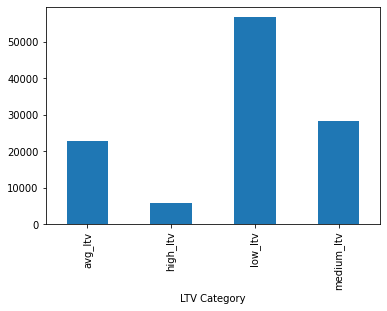

In [39]:
ltv_make_model_r.groupby('LTV Category').size().plot(kind='bar')

In [40]:
# Getting the number of fundings according to year
cnt_srs = ltv_make_model_r["LTV Category"].value_counts()
# sorting the years in ascending order
cnt_srs = cnt_srs.sort_index()
# setting uo the bar graph
trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    
)
# setting the layout
layout = go.Layout(
    title=go.layout.Title(
        text="Customer LTV Catogarization",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=500,
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="funding")

In [136]:
merge_data=pd.merge(ltv_make_model_r, df5, on='Customer No.')

In [137]:
merge_data

,Make,Model,City,Customer No.,Invoice No,Total_Expense,Job_duration(in hrs),LTV,LTV Category,Clusters
0,AUDI,A8,Thanjavur,164341,1,217.440000,0.000000,217.44,low_ltv,high_revenue
1,AUDI,A8,Thanjavur,164341,1,217.440000,0.000000,217.44,low_ltv,high_revenue
2,HYUNDAI,VERNA,Thanjavur,164341,5,16071.566000,53.800000,80357.83,high_ltv,high_revenue
3,HYUNDAI,VERNA,Thanjavur,164341,5,16071.566000,53.800000,80357.83,high_ltv,high_revenue
4,AUDI,Q7,Moga,85119,3,524.933333,2.000000,1574.80,low_ltv,low_revenue
...,...,...,...,...,...,...,...,...,...,...
42742,VOLKSWAGEN,VENTO,Tirunelveli,206379,8,6567.853750,103.375000,52542.83,high_ltv,avg_revenue
42743,VOLKSWAGEN,VENTO,Tirunelveli,206379,8,6567.853750,103.375000,52542.83,high_ltv,high_revenue
42744,VOLKSWAGEN,VENTO,Tirunelveli,228476,3,11843.713333,210.666667,35531.14,high_ltv,avg_revenue
42745,VOLKSWAGEN,VENTO,Tirunelveli,228476,3,11843.713333,210.666667,35531.14,high_ltv,high_revenue


In [145]:
merge_data.groupby("Clusters").LTV.mean()

Clusters
avg_revenue       15641.740448
high_revenue      52724.188938
low_revenue        6322.309485
medium_revenue    11321.760781
Name: LTV, dtype: float64

In [151]:
dd=merge_data.groupby("Clusters").LTV.mean()
over=pd.DataFrame(dict(Clusters=dd.index, Average=dd.values))

In [153]:
import plotly.graph_objects as go
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']

fig = go.Figure(data=[go.Pie(labels=over['Clusters'],
                             values=over['Average'])])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()
# fig.write_image("fig1.w

# machine Leraing

In [44]:
df2=merge_data.copy()
df2

,Make,Model,City,Customer No.,Invoice No,Total_Expense,Job_duration(in hrs),LTV,LTV Category,Clusters
0,AUDI,A8,Thanjavur,164341,1,217.440000,0.000000,217.44,low_ltv,high_revenue
1,AUDI,A8,Thanjavur,164341,1,217.440000,0.000000,217.44,low_ltv,high_revenue
2,HYUNDAI,VERNA,Thanjavur,164341,5,16071.566000,53.800000,80357.83,high_ltv,high_revenue
3,HYUNDAI,VERNA,Thanjavur,164341,5,16071.566000,53.800000,80357.83,high_ltv,high_revenue
4,AUDI,Q7,Moga,85119,3,524.933333,2.000000,1574.80,low_ltv,low_revenue
...,...,...,...,...,...,...,...,...,...,...
42742,VOLKSWAGEN,VENTO,Tirunelveli,206379,8,6567.853750,103.375000,52542.83,high_ltv,avg_revenue
42743,VOLKSWAGEN,VENTO,Tirunelveli,206379,8,6567.853750,103.375000,52542.83,high_ltv,high_revenue
42744,VOLKSWAGEN,VENTO,Tirunelveli,228476,3,11843.713333,210.666667,35531.14,high_ltv,avg_revenue
42745,VOLKSWAGEN,VENTO,Tirunelveli,228476,3,11843.713333,210.666667,35531.14,high_ltv,high_revenue


In [45]:
le=LabelEncoder()
df2["Make"]=le.fit_transform(df2["Make"])
df2["Model"]=le.fit_transform(df2["Model"])
df2["LTV Category"]=le.fit_transform(df2["LTV Category"])
df2["City"]=le.fit_transform(df2["City"])
df2["Clusters"]=le.fit_transform(df2["Clusters"])

In [46]:
X=df2.drop(["Customer No.","LTV","LTV Category","Invoice No",'Clusters'],1)
y=df2["LTV Category"]

In [47]:
X

,Make,Model,City,Total_Expense,Job_duration(in hrs)
0,0,9,341,217.440000,0.000000
1,0,9,341,217.440000,0.000000
2,9,196,341,16071.566000,53.800000
3,9,196,341,16071.566000,53.800000
4,0,142,228,524.933333,2.000000
...,...,...,...,...,...
42742,23,193,348,6567.853750,103.375000
42743,23,193,348,6567.853750,103.375000
42744,23,193,348,11843.713333,210.666667
42745,23,193,348,11843.713333,210.666667


In [48]:
y

0        2
1        2
2        1
3        1
4        2
        ..
42742    1
42743    1
42744    1
42745    1
42746    1
Name: LTV Category, Length: 42747, dtype: int64

In [49]:
X_train,X_test,y_train,y_test=tts(X,y,test_size=0.3,random_state=0)

# Decision Tree Classifier

In [50]:
dt = DecisionTreeClassifier(criterion='entropy',max_depth=8,random_state=0)

dt.fit(X_train,y_train)

y_pred_dt = dt.predict(X_test)
y_pred_dt_train = dt.predict(X_train)

print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.76      0.93      0.84      7542
           1       0.95      0.38      0.55      2524
           2       0.87      0.86      0.87      1116
           3       0.61      0.52      0.56      1643

    accuracy                           0.77     12825
   macro avg       0.80      0.68      0.70     12825
weighted avg       0.79      0.77      0.75     12825



In [51]:
print("Training Accuracy :-" , accuracy_score(y_test,y_pred_dt))
print("Testing Accuracy :-" ,accuracy_score(y_train,y_pred_dt_train))

Training Accuracy :- 0.7673294346978558
Testing Accuracy :- 0.7723748412539269


<BarContainer object of 5 artists>

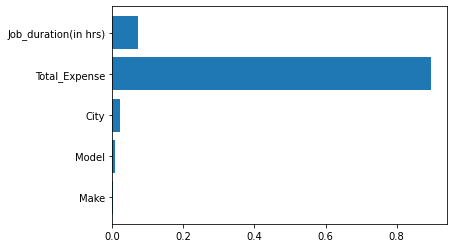

In [52]:
plt.barh(list(X),list(dt.feature_importances_))

# Random Forest Classifier


In [53]:
rfc=RandomForestClassifier(criterion='entropy',max_depth=8,random_state=0)

In [54]:
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, random_state=0)

In [55]:
y_pred_rfc=rfc.predict(X_test)

In [56]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.75      0.96      0.84      7542
           1       0.98      0.39      0.56      2524
           2       0.86      0.91      0.88      1116
           3       0.68      0.41      0.51      1643

    accuracy                           0.77     12825
   macro avg       0.82      0.67      0.70     12825
weighted avg       0.80      0.77      0.75     12825



In [57]:
accuracy_score(y_test,y_pred_rfc)

0.7743469785575049

<BarContainer object of 5 artists>

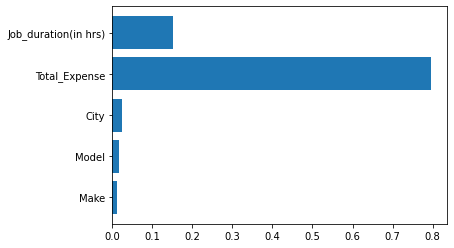

In [58]:
plt.barh(list(X),list(rfc.feature_importances_))

In [59]:
score=cross_val_score(estimator=rfc,X=X,y=y,cv=5)

In [60]:
score.mean()

0.6216170832196097

# XgBoost Classifier

In [61]:
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred_xgb=xgb.predict(X_test)
accuracy_score(y_test,y_pred_xgb)
print(classification_report(y_test,y_pred_xgb))


[23:15:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      7542
           1       0.89      0.63      0.74      2524
           2       0.90      0.92      0.91      1116
           3       0.74      0.66      0.69      1643

    accuracy                           0.84     12825
   macro avg       0.84      0.79      0.81     12825
weighted avg       0.84      0.84      0.83     12825



In [62]:
scores_xgb=cross_val_score(estimator=xgb,X=X,y=y,cv=5)
scores_xgb.mean()

[23:15:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:15:33] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:15:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:15:40] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

0.6171953109662291

# Regression

In [120]:
df3=merge_data.copy()
df3

,Make,Model,City,Customer No.,Invoice No,Total_Expense,Job_duration(in hrs),LTV,LTV Category,Clusters
0,AUDI,A8,Thanjavur,164341,1,217.440000,0.000000,217.44,low_ltv,high_revenue
1,AUDI,A8,Thanjavur,164341,1,217.440000,0.000000,217.44,low_ltv,high_revenue
2,HYUNDAI,VERNA,Thanjavur,164341,5,16071.566000,53.800000,80357.83,high_ltv,high_revenue
3,HYUNDAI,VERNA,Thanjavur,164341,5,16071.566000,53.800000,80357.83,high_ltv,high_revenue
4,AUDI,Q7,Moga,85119,3,524.933333,2.000000,1574.80,low_ltv,low_revenue
...,...,...,...,...,...,...,...,...,...,...
42742,VOLKSWAGEN,VENTO,Tirunelveli,206379,8,6567.853750,103.375000,52542.83,high_ltv,avg_revenue
42743,VOLKSWAGEN,VENTO,Tirunelveli,206379,8,6567.853750,103.375000,52542.83,high_ltv,high_revenue
42744,VOLKSWAGEN,VENTO,Tirunelveli,228476,3,11843.713333,210.666667,35531.14,high_ltv,avg_revenue
42745,VOLKSWAGEN,VENTO,Tirunelveli,228476,3,11843.713333,210.666667,35531.14,high_ltv,high_revenue


In [121]:
le=LabelEncoder()
df3["Make"]=le.fit_transform(df2["Make"])
df3["Model"]=le.fit_transform(df2["Model"])
df3["LTV Category"]=le.fit_transform(df2["LTV Category"])
df3["City"]=le.fit_transform(df2["City"])
df3["Clusters"]=le.fit_transform(df2["Clusters"])

In [122]:
df3

,Make,Model,City,Customer No.,Invoice No,Total_Expense,Job_duration(in hrs),LTV,LTV Category,Clusters
0,0,9,341,164341,1,217.440000,0.000000,217.44,2,1
1,0,9,341,164341,1,217.440000,0.000000,217.44,2,1
2,9,196,341,164341,5,16071.566000,53.800000,80357.83,1,1
3,9,196,341,164341,5,16071.566000,53.800000,80357.83,1,1
4,0,142,228,85119,3,524.933333,2.000000,1574.80,2,2
...,...,...,...,...,...,...,...,...,...,...
42742,23,193,348,206379,8,6567.853750,103.375000,52542.83,1,0
42743,23,193,348,206379,8,6567.853750,103.375000,52542.83,1,1
42744,23,193,348,228476,3,11843.713333,210.666667,35531.14,1,0
42745,23,193,348,228476,3,11843.713333,210.666667,35531.14,1,1


In [123]:
X=df3.drop(["Customer No.","LTV","Invoice No",'LTV Category'],1)
y=df3["LTV"]

In [124]:
X

,Make,Model,City,Total_Expense,Job_duration(in hrs),Clusters
0,0,9,341,217.440000,0.000000,1
1,0,9,341,217.440000,0.000000,1
2,9,196,341,16071.566000,53.800000,1
3,9,196,341,16071.566000,53.800000,1
4,0,142,228,524.933333,2.000000,2
...,...,...,...,...,...,...
42742,23,193,348,6567.853750,103.375000,0
42743,23,193,348,6567.853750,103.375000,1
42744,23,193,348,11843.713333,210.666667,0
42745,23,193,348,11843.713333,210.666667,1


In [125]:
X.columns

Index(['Make', 'Model', 'City', 'Total_Expense', 'Job_duration(in hrs)',
       'Clusters'],
      dtype='object')

In [126]:
# from sklearn.preprocessing import StandardScaler
# cols = list(X)
# for i in cols:
    
#     # fit on training data column
#     scale = StandardScaler().fit(X[[i]])
    
#     # transform the training data column
#     X[i] = scale.transform(X[[i]])

In [127]:
X_train,X_test,y_train,y_test=tts(X,y,test_size=0.25,random_state=0)

In [128]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['Make', 'Model', 'City', 'Total_Expense', 'Job_duration(in hrs)',
       'Clusters']] = scaler.fit_transform(X_train[['Make', 'Model', 'City', 'Total_Expense', 'Job_duration(in hrs)',
       'Clusters']])
X_test[['Make', 'Model', 'City', 'Total_Expense', 'Job_duration(in hrs)',
       'Clusters']] = scaler.transform(X_test[['Make', 'Model', 'City', 'Total_Expense', 'Job_duration(in hrs)',
       'Clusters']])

In [129]:
X_train

,Make,Model,City,Total_Expense,Job_duration(in hrs),Clusters
21244,-0.142723,0.673339,-1.004202,-0.348263,-0.348740,-0.656117
12658,-1.336587,-1.546835,-1.523614,-0.384447,0.741849,2.511820
12277,-1.535564,-0.743794,0.231641,-0.397669,-0.468994,-0.656117
12906,-1.336587,-1.483851,-0.789273,-0.208134,-0.408511,-0.656117
29284,0.056255,1.287429,-0.843005,-0.222216,-0.202158,-0.656117
...,...,...,...,...,...,...
32103,1.648074,-0.476113,-0.028065,-0.258240,0.043332,-0.656117
30403,0.653187,1.035495,0.652544,0.000662,-0.447647,-0.656117
21243,-0.142723,0.673339,-1.004202,-0.571625,-0.486190,-0.656117
42613,2.046029,0.326929,-0.780317,0.167150,-0.097795,0.399862


In [130]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [131]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor

xgbre = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
xgbre.fit(X_train,y_train)
y_pred = xgbre.predict(X_test)
xgbre.score(X_train,y_train)
xgbre.score(X_test,y_test)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, eta=0.1, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.100000001, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

0.9873203228599974

0.8576227737618861

In [132]:

y_train_pred = xgbre.predict(X_train)
y_pred = xgbre.predict(X_test)
print('Train r2 score: ', r2_score(y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
train_mse = mean_squared_error(y_train_pred, y_train)
test_mse = mean_squared_error(y_pred, y_test)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
print('Train RMSE: %.4f' % train_rmse)
print('Test RMSE: %.4f' % test_rmse)

Train r2 score:  0.9867451045994101
Test r2 score:  0.8576227737618861
Train RMSE: 4394.5885
Test RMSE: 16368.4228


In [133]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=500,random_state=0,).fit(X_train, y_train)

y_pred = rfr.predict(X_test)

r2_score(y_test,y_pred)


0.771119762623506